In [1]:
import pandas as pd

In [3]:
my_dict = {'X': [1,2,3,4], 'Y': [5,6,7,8], 'Z': [4,5,6,7]}
print(my_dict)

{'X': [1, 2, 3, 4], 'Y': [5, 6, 7, 8], 'Z': [4, 5, 6, 7]}


In [6]:
df = pd.DataFrame(my_dict)
df

,X,Y,Z
0,1,5,4
1,2,6,5
2,3,7,6
3,4,8,7


In [8]:
df2 = pd.DataFrame({'X': [1,2,3,4], 'Y': [5,6,7,8], 'Z': [4,5,6,7]})

In [9]:
df == df2

,X,Y,Z
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True


In [10]:
df['X']

,X
0,1
1,2
2,3
3,4


Axis:
* 0: raws (default)
* 1: columns

In [11]:
type(df['X'])

pandas.core.series.Series

In [12]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df['X'][1]

2

In [14]:
df.X

,X
0,1
1,2
2,3
3,4


In [18]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [19]:
df.columns

Index(['X', 'Y', 'Z'], dtype='object')

In [24]:
import numpy as np
df['W'] = np.r_[1:9:2]
df

,X,Y,Z,W
0,1,5,4,1
1,2,6,5,3
2,3,7,6,5
3,4,8,7,7


In [34]:
df = pd.DataFrame(my_dict)
df['W'] = np.r_[1:9:2]
df2 = df.drop('W', axis=1) # new variable (copy, not alias)
df2
df.drop('W', axis=1, inplace=True) # mutation
df.drop(columns=['X'])

,Y,Z
0,5,4
1,6,5
2,7,6
3,8,7


In [35]:
df = pd.DataFrame(my_dict)
df['W'] = np.r_[1:9:2]
df2 = df.drop('W') # the error is since default axis=0


KeyError: "['W'] not found in axis"

In [40]:
# iloc: index-based location (matrix-like) [rows, columns]
df = pd.DataFrame(my_dict)
df['W'] = np.r_[1:9:2]
df.iloc[:2,3:4] # does not include 2 (standart Python convention)

,W
0,1
1,3


In [46]:
# loc: label based
df = pd.DataFrame(my_dict)
df['W'] = np.r_[1:9:2]
df.loc[1:2, 'X'] # does include 2 (Matlab-like) !!!!!

,X
1,2
2,3


In [47]:
df2 = df > 3

In [49]:
df[df.X > 3]

,X,Y,Z,W
3,4,8,7,7


`|` or
`&` and

In [51]:
df[(df.X > 3) | (df.Y < 6)]

,X,Y,Z,W
0,1,5,4,1
3,4,8,7,7


In [52]:
df[df.X > 3 | df.Y < 6]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [60]:
df.X - np.r_[7:3:-1]
df.X/df.Y
df['A'] = df.X**2
df

,X,Y,Z,W,A
0,1,5,4,1,1
1,2,6,5,3,4
2,3,7,6,5,9
3,4,8,7,7,16


In [64]:
df.mean(axis=0)

,0
X,2.5
Y,6.5
Z,5.5
W,4.0
A,7.5


In [66]:
type(df.A.mean())

numpy.float64

In [67]:
df.corr()

,X,Y,Z,W,A
X,1.000000,1.000000,1.000000,1.000000,0.984374
Y,1.000000,1.000000,1.000000,1.000000,0.984374
Z,1.000000,1.000000,1.000000,1.000000,0.984374
W,1.000000,1.000000,1.000000,1.000000,0.984374
A,0.984374,0.984374,0.984374,0.984374,1.000000


## `groupby`

In [69]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20],
                   'data2': range(9,0,-1)})
df

,key,data,data2
0,A,0,9
1,B,5,8
2,C,10,7
3,A,5,6
4,B,10,5
5,C,15,4
6,A,10,3
7,B,15,2
8,C,20,1


Mean of `data` for each `key`

In [71]:
df.groupby('key').mean()

,data,data2
key,,
A,5.0,6.0
B,10.0,5.0
C,15.0,4.0


In [72]:
df.groupby('key')['data'].mean()

,data
key,
A,5.0
B,10.0
C,15.0


In [74]:
df.groupby('key').mean()['data']
df2 = df.groupby('key').mean()
df2['data']

,data
key,
A,5.0
B,10.0
C,15.0


In [76]:
df.groupby('key').first()

,data,data2
key,,
A,0,9
B,5,8
C,10,7


`aggregate`

In [85]:
df.iloc[:,1:].aggregate(['mean','min'])

,data,data2
mean,10.0,5.0
min,0.0,1.0


In [87]:
df.aggregate({'data': 'mean', 'data2': 'min'})

,0
data,10.0
data2,1.0


In [89]:
def my_func(x):
    return x.max() - x.min()
df.groupby('key').aggregate(my_func)
df.aggregate({'data': my_func})

,0
data,20


<Axes: >

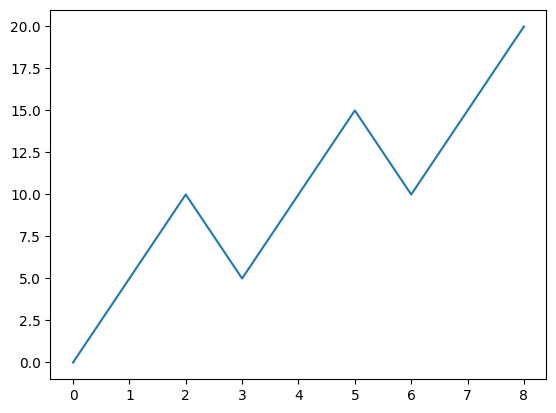

In [91]:
df['data'].plot()

In [95]:
a = np.array([1,np.nan,3])
a.sum()

nan

In [100]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, np.nan, 10, 5, 10, 15, 10, 15, 20],
                   'data2': range(9,0,-1)})
df

,key,data,data2
0,A,0.0,9
1,B,NaN,8
2,C,10.0,7
3,A,5.0,6
4,B,10.0,5
5,C,15.0,4
6,A,10.0,3
7,B,15.0,2
8,C,20.0,1


In [101]:
df.groupby('key').mean()

,data,data2
key,,
A,5.0,6.0
B,12.5,5.0
C,15.0,4.0
